## What is hierarchical clustering?

*Hierarchical clustering* is a hard clustering technique that aims to build a treelike hierarchy of clusters within the data. This treelike hierarchical representation of the clusters is called a *dendrogram*.

In general, there are two types of hierarchical clustering approaches:

1. **Bottom-up approach:** Also called *agglomerative clustering*, this approach starts with the individual observations as stand-alone clusters. Then, it does the following:
    * It combines the two most similar clusters into one, hence decreasing the total number of clusters by one.
    * It repeats the previous step above until only a single cluster remains. The figure above illustrates this approach.
    
2. **Top-down approach:** Also called *divisive clustering*, this approach starts with a single cluster. Then, it does the following:
    * It uses a parametric clustering algorithm like k-means to divide the cluster into two clusters.
    * It repeats the step above for every subcluster until all observations are clustered as stand-alone clusters.

In the rest of this lesson, you'll focus on agglomerative clustering. Notice that with the agglomerative clustering algorithm, you need to determine the two most similar clusters at each step. Next, you'll learn how to do this.


# Similarity metrics in hierarchical clustering

Throughout the program, you have come across several metrics that measure the distance between high-dimensional observations. For example, when you learned about linear regression and the ordinary least squares (OLS) method, you used the *sum of the squares of the errors* as a loss function. This metric is essentially the Euclidean or L2 distance. In hierarchical clustering, you use similar distance metrics. These are the three most common metrics:

* **Euclidean distance:** This is also known as *L2 distance*. You also used this metric to measure similarity in the k-means algorithm.
* **Manhattan distance:** This is also known as *L1 distance*. You used this metric as a regularization term in the lasso regression.
* **Cosine distance:** This is another metric that is commonly used in machine learning. You won't go into details of this metric here, but it would be a good choice if you have too many variables and some are insignificant. Cosine distance takes into account the shape of the variables more than their values. It tends to associate observations that have the same maximum and minimum variables regardless of their values.

Apart from the metric that you use to measure similarity between clusters, you also need to decide how to select the representative elements of the clusters when calculating the similarities. To this end, here are three different techniques, which are called *linkage methods*:

# Linkage methods

* **Ward:** This method tends to look for spherical clusters such that the clusters are cohesive inside and differentiated from other groups. In general, this method tends to find clusters of similar size. Note that the Ward method only works with Euclidean distance.
* **Complete:** This method links clusters using their furthest observations, that is, their most dissimilar data points. Consequently, clusters created using this method tend to be composed of highly similar observations, making the resulting groups quite compact.
* **Average:** This method links clusters using their centroids. Because this method focuses on centroids and ignores the boundary points, it tends to create larger groups than the complete method. Moreover, the clusters can be different sizes and shapes, in contrast to the Ward method.

# Speed

The runtime complexity of divisive clustering depends on the clustering technique used in the first step. You're focusing on agglomerative clustering in this lesson, so take some time to analyze its complexity in more detail. In agglomerative clustering, you perform $n$ iterations. In each iteration, you need to calculate (or update) the similarities between the $n$ clusters. So updating similarities takes $n^2$ operations, and you do this for each iteration—which in turn makes the time complexity of the agglomerative clustering $O(n^3)$. If the number of observations is too high, then the time to run agglomerative clustering will be too long to be practical.

When you have too many observations, you can consider using PCA to reduce dimensionality before applying hierarchical clustering.

## Agglomerative clustering in action

Now, it's time to implement agglomerative clustering. You'll try it out on the *Iris* dataset from the earlier lesson.

Although you can find the dataset [on the internet](https://archive.ics.uci.edu/ml/datasets/iris), you'll load it using scikit-learn's `datasets` module. To this purpose, import the module (`from sklearn import datasets`) and then load the dataset (`iris = datasets.load_iris()`):

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

After loading the dataset, standardize your features; most of the clustering algorithms are sensitive to the scales of the variables.

**Note:** Clustering algorithms are sensitive to the variable scale of the metrics that are used to analyze similarity. For example, the L2 norm (Euclidean distance), which is a common measure of similarity, is sensitive to variable scale. Similarly, the cosine distance that you'll use in the following implementation of the agglomerative clustering is also sensitive to the mean and hence the scale of the variables. For more information, see [this post on Stack Overflow](https://stats.stackexchange.com/questions/292596/is-feature-normalisation-needed-prior-to-computing-cosine-distance).

In [2]:
# Loading the data from scikit-learn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

You can use the `AgglomerativeClustering` class from scikit-learn's clustering module. You imported it before as `from sklearn.cluster import AgglomerativeClustering`. Note that, in scikit-learn's jargon, the *affinity* parameter for `AgglomerativeClustering` refers to the similarity metric that was discussed before. Moreover, the `n_clusters` parameter denotes the number of clusters that you want, which is equivalent to cutting the dendrogram from the respective height. But don't get confused—agglomerative clustering doesn't require you to specify the number of clusters beforehand. **Scikit-learn's implementation uses this parameter just to determine when to stop**. So, scikit-learn's implementation of the agglomerative clustering will stop and return the clusters when the specified `n_clusters` value is reached.

You can use the `complete` method for linkage and `cosine` for measuring the similarities of the clusters. Below, also set `n_clusters=3`, because the *Iris* dataset includes three species. You can play with the other methods and values and compare their results with each other.

In [3]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete',
                                      metric='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

Below, sketch the clusters assigned by agglomerative clustering. To be able to do that, apply PCA to the four features that you have, and use the first two principal components.

In the plot below, the numbers show the cluster that each observation has been assigned to by the algorithm. The colors denote the true classes.

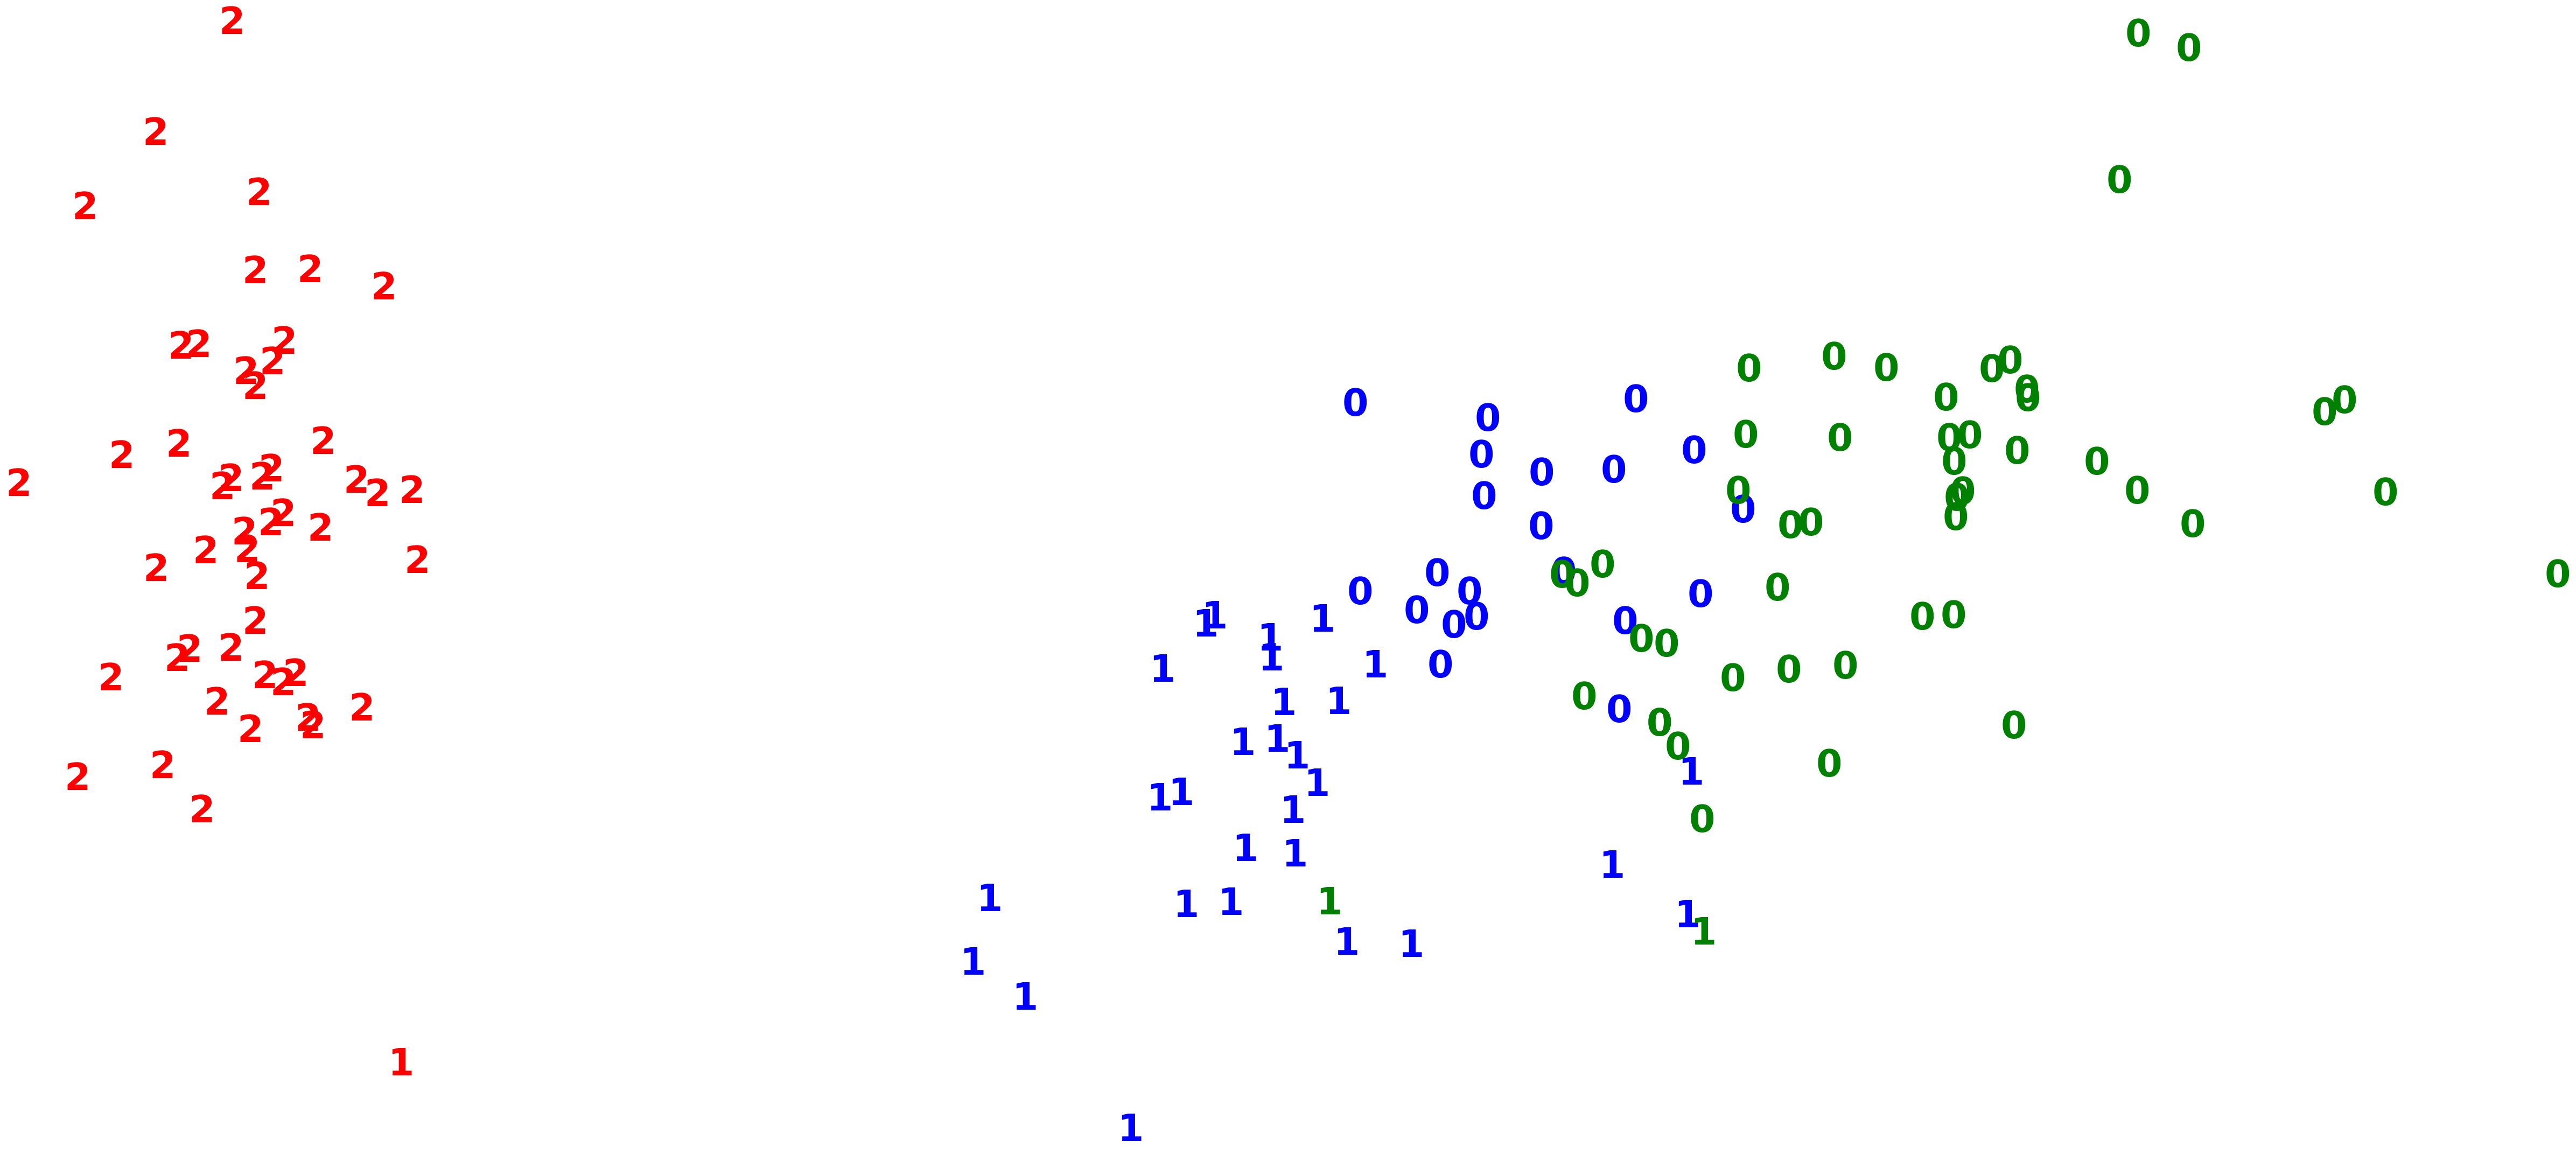

In [4]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Now, get the Adjusted Rand Index (ARI) and the silhouette scores for the agglomerative clustering approach, and compare them with the results for k-means from the previous lesson:

In [5]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.6334862915668319
The silhouette score of the Agglomerative Clustering solution: 0.4466248394937203


The ARI score for the agglomerative clustering approach is `0.63`. That's slightly higher than the score for k-means, which was `0.62`. However, the silhouette score of the algorithm is `0.45`, which is slightly lower than that of the k-means, which was `0.46`. Overall, the comparison is not very decisive, and both algorithms achieve more or less the same performance.

To close things out, here's a demonstration of how you can implement agglomerative clustering and generate a dendrogram using SciPy. You already imported the package that you need (using `from scipy.cluster.hierarchy import dendrogram, linkage`). So below, sketch the dendrogram using the `complete` linkage method.

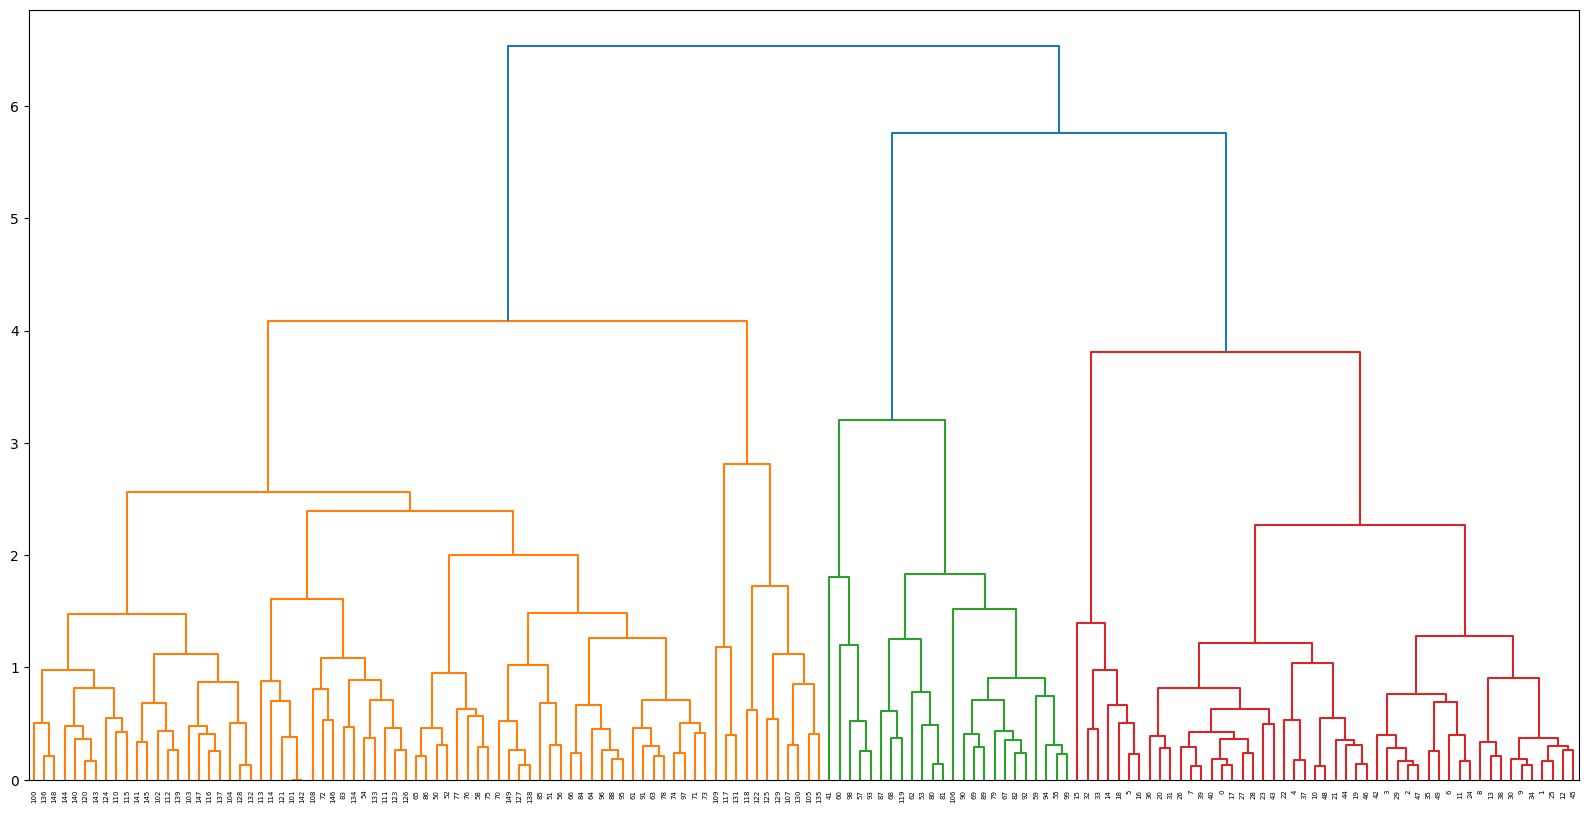

In [6]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

By investigating this dendrogram, you can try to choose the number of clusters that best match your needs.

### Q1. Apply this technique to the [heart disease dataset](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) from the UC Irvine Machine Learning Repository.

First, load the dataset from Thinkful's database.

In [7]:
from sqlalchemy import create_engine, text

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

with engine.begin() as conn:
    query = text("""SELECT * FROM heartdisease""")
    heart_disease_df = pd.read_sql_query(query, conn)

# no need for an open connection, as we're only doing a single query
engine.dispose()

Next, perform preprocessing.

In [8]:
# Define the features and the outcome
X = heart_disease_df.iloc[:, :13]
y = heart_disease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 1, 0)

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#### Q1(a). Produce dendrograms for the heart disease dataset. Use three different linkage methods: `complete`, `average`, and `ward`. Which linkage method do you think produces the most reasonable result?

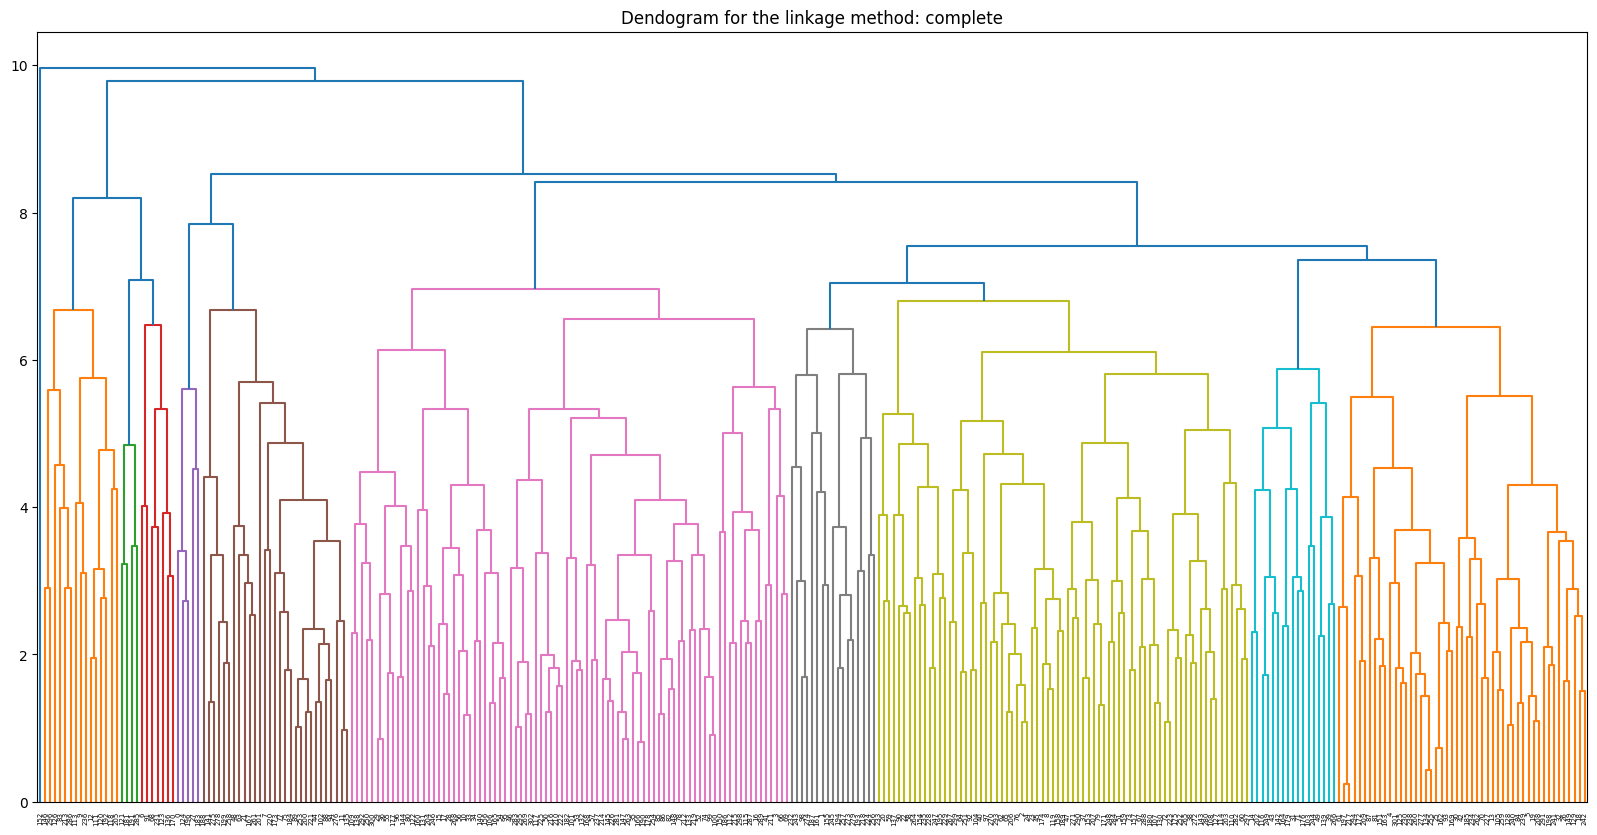

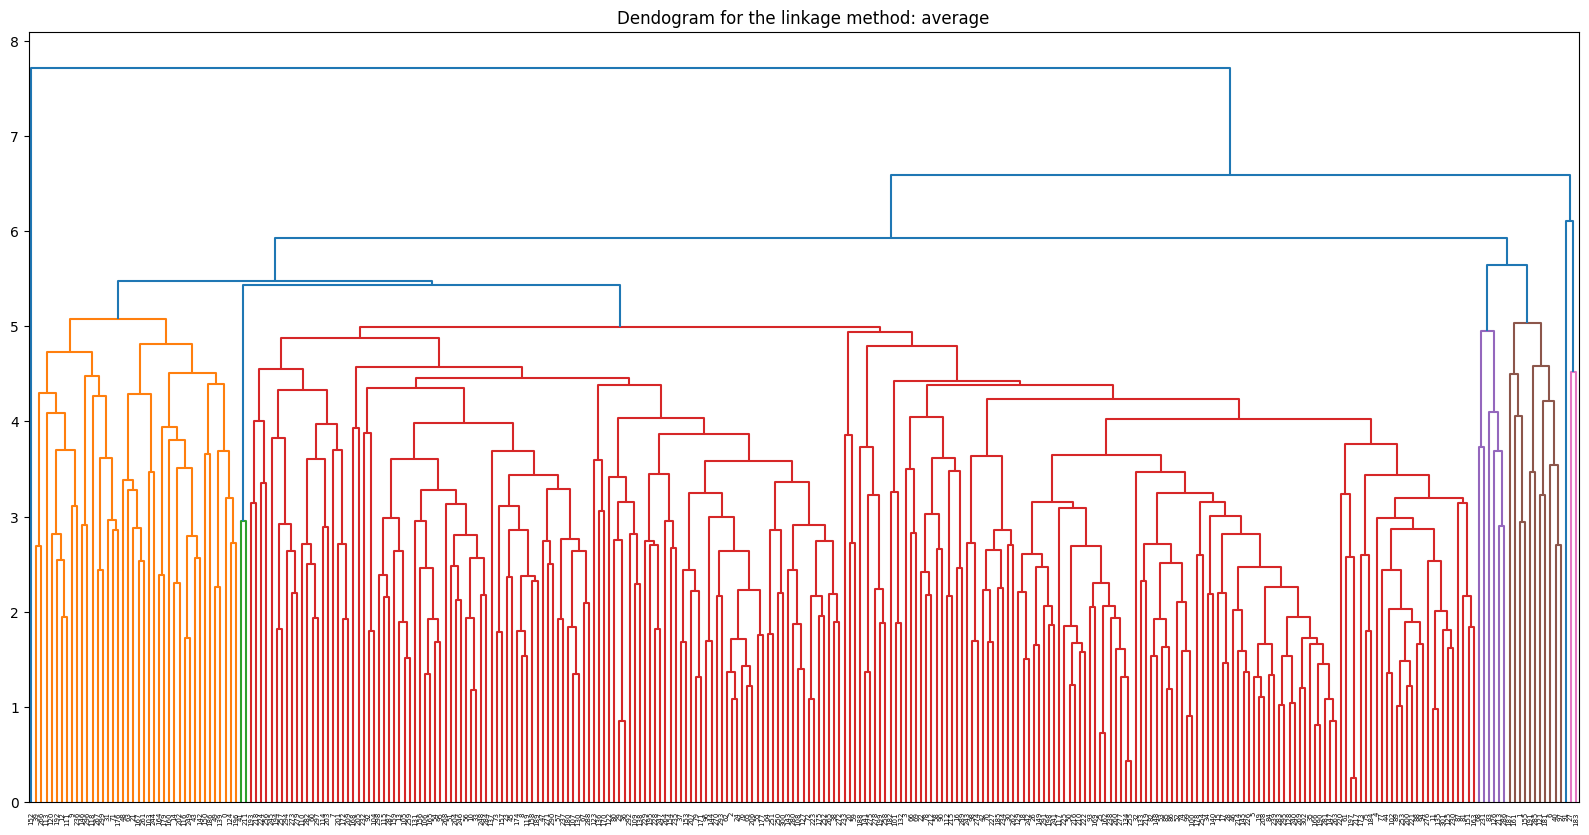

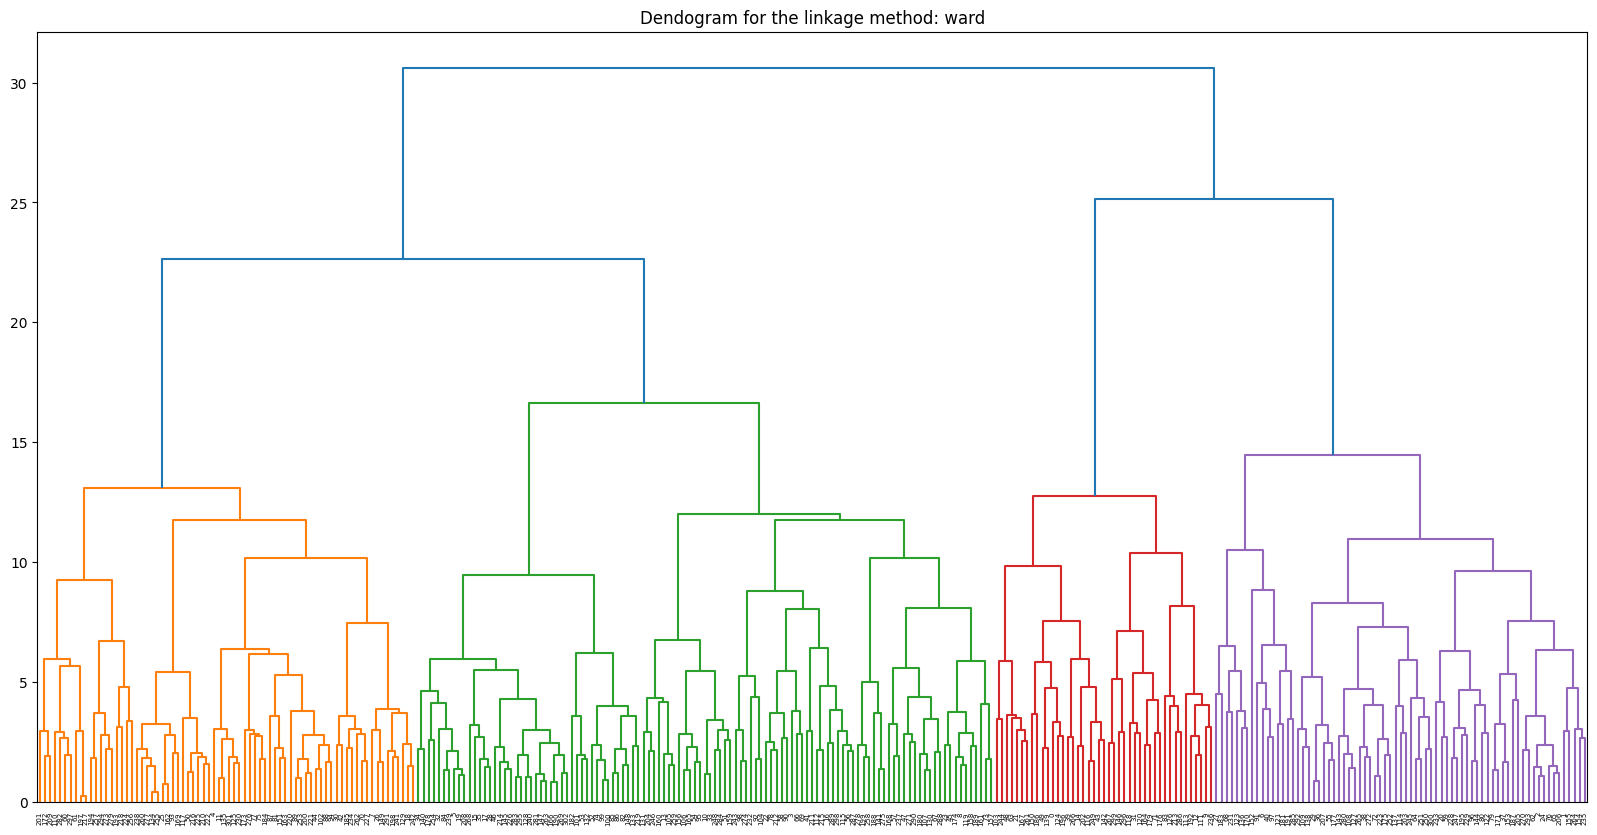

In [9]:
methods = ['complete','average','ward']

for i,m in enumerate(methods):
  plt.figure(figsize=(20,10))
  dendrogram(linkage(X_std, method=methods[i]))
  plt.title('Dendogram for the linkage method: {}'.format(methods[i]))
  plt.show()

In my data, `ward` gave the best results. The dendrogram for `average` and `complete` are hard to interpret and have too much or too little observations for one or more of the clusters.

#### Q1(b). Apply agglomerative clustering to the heart disease data by setting `n_clusters=2`. Try the three linkage methods above, and get ARI and silhouette scores for each of your solutions. Compare the results with each other. Then compare the results with the results from the k-means solution that you implemented in the previous lesson's assessment. Which algorithm and setting perform better?

In [10]:
methods = ['complete','average','ward']

for i,m in enumerate(methods):

  # For ward, use Euclidean distance
  if methods[i] == "ward":
    d_metric = 'euclidean'
  else:
    d_metric = 'cosine'

  # Define the agglomerative clustering
  print('The linkage method is: {}'.format(methods[i]))
  agg_cluster = AgglomerativeClustering(linkage=methods[i],
                                      metric=d_metric,
                                      n_clusters=2)

  # Fit model
  clusters = agg_cluster.fit_predict(X_std)

  # Print the ARI and silhouette scores
  print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
  print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
  print("-----------------------------------------------------------------")


The linkage method is: complete
Adjusted Rand Index of the Agglomerative Clustering solution: 0.21394030618551016
The silhouette score of the Agglomerative Clustering solution: 0.11730765444448985
-----------------------------------------------------------------
The linkage method is: average
Adjusted Rand Index of the Agglomerative Clustering solution: 0.29404901333534655
The silhouette score of the Agglomerative Clustering solution: 0.14837359969689895
-----------------------------------------------------------------
The linkage method is: ward
Adjusted Rand Index of the Agglomerative Clustering solution: 0.146129913123814
The silhouette score of the Agglomerative Clustering solution: 0.1387197366557222
-----------------------------------------------------------------


With agglomerative clustering, the best scores are achieved by the linkage method `average` with an ARI and silhouette score of `0.294` and `0.148`. The ARI and silhouette scores of the two cluster k-means solution was `0.436` and `0.174` respectively. Therefore, in this example, the two cluster k-means solution outperformed agglomerative clustering in both metrics.